In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import nltk
from nltk.corpus import PlaintextCorpusReader

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
plt.rc('xtick', labelsize=20)     
plt.rc('ytick', labelsize=20)

In [2]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... lexical diversity score - as given in nltk site
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

def lexical_diversity(my_text_data):
    tokens = len(my_text_data)
    types = len(set(my_text_data))
    diversity_score = types / tokens
    return diversity_score

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... some directory and file name definitions
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

files = ".*\.txt"
home_dir = "/home/mcdevitt/_ds/_smu/msds_7337_nlp/homework_01/"
corpus_root = "./texts"
plot_dir = "./plots/"

In [3]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... read in texts / assemble corpus for evaluation
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

readers = PlaintextCorpusReader(corpus_root, files)

readers.fileids()

corpus = nltk.Text(readers.words())

['literary_world_seventh_reader.txt',
 'mcguffey_01.txt',
 'mcguffey_02.txt',
 'mcguffey_03.txt',
 'mcguffey_04.txt',
 'mcguffey_05.txt',
 'mcguffey_06.txt',
 'new_national_first_reader.txt',
 'ontario_high_school_reader.txt']

In [4]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... create table to accumulate summary data
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

results_tbl = pd.DataFrame(columns =
    ['text_name',
     'num_chars',
     'num_words',
     'num_sents',
     'num_vocab',
     'tokens',
     'types',
     'lex_div'])

i_index = []
i_index = 0

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... loop thru each text to assemble metrics
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

print("Some basic statistics\n")

for fileid in readers.fileids():
    num_chars = len(readers.raw(fileid))
    num_words = len(readers.words(fileid))
    num_sents = len(readers.sents(fileid))
    tokens = len(readers.words(fileid))
    types = len(set(readers.words(fileid)))
    num_vocab = len(set(w.lower() for w in readers.words(fileid)))
#    print(round(num_chars/num_words, 2),
#          round(num_words/num_sents, 2),
#          round(num_words/num_vocab, 2), fileid)    
    rtxt = readers.words(fileid)
    ldiv = lexical_diversity(rtxt)
    print(round(ldiv, 4), fileid)

    table_data = {
     'text_name' : fileid,
     'num_chars' : num_chars,
     'num_words' : num_words,
     'num_sents' : num_sents,
     'num_vocab' : num_vocab,
     'tokens' : tokens,
     'types' : types,
     'lex_div' : ldiv
    } 

    df_tbl = pd.DataFrame(table_data,
        columns = ['text_name',
             'num_chars',
             'num_words',
             'num_sents',
             'num_vocab',
             'tokens',
             'types',
             'lex_div'],
    index = [i_index + 1])
    i_index += 1
    results_tbl = results_tbl.append(df_tbl)

results_tbl['vocab_ldiv'] = results_tbl.apply(lambda x: x.lex_div / (x.num_words), axis=1)

Some basic statistics

0.0951 literary_world_seventh_reader.txt
0.1592 mcguffey_01.txt
0.1509 mcguffey_02.txt
0.122 mcguffey_03.txt
0.1161 mcguffey_04.txt
0.1081 mcguffey_05.txt
0.0979 mcguffey_06.txt
0.1237 new_national_first_reader.txt
0.1127 ontario_high_school_reader.txt


In [5]:
results_tbl = results_tbl.sort_values(results_tbl.columns[7])
print('Results_tbl - sorted by col 8')
results_tbl

Results_tbl - sorted by col 8


,text_name,num_chars,num_words,num_sents,num_vocab,tokens,types,lex_div,vocab_ldiv
1,literary_world_seventh_reader.txt,621667,130616,6342,11264,130616,12422,0.095103,7.281130e-07
7,mcguffey_06.txt,841512,172590,8800,14611,172590,16901,0.097926,5.673893e-07
6,mcguffey_05.txt,605268,130113,8621,12005,130113,14067,0.108114,8.309217e-07
9,ontario_high_school_reader.txt,513006,102546,5585,9807,102546,11557,0.112701,1.099025e-06
5,mcguffey_04.txt,388598,87278,6197,8826,87278,10136,0.116135,1.330629e-06
4,mcguffey_03.txt,168149,38367,3249,4027,38367,4682,0.122032,3.180649e-06
8,new_national_first_reader.txt,63706,15499,1272,1636,15499,1918,0.123750,7.984381e-06
3,mcguffey_02.txt,121597,26439,2299,3391,26439,3989,0.150876,5.706555e-06
2,mcguffey_01.txt,63814,13328,1104,1833,13328,2122,0.159214,1.194580e-05


In [6]:
results = results_tbl.copy()

results = results.sort_values(results_tbl.columns[7], ascending = False)

df = results.iloc[:, 1:8]
#df_nrml = (df - df.min()) / (df.max() - df.min())
df_nrml = df / df.max()

#df_nrml
df_labels = results.iloc[:, 0]
df_labels

results = pd.concat([df_labels, df_nrml], axis = 1)

results['vocab_ldiv'] = results.apply(lambda x: x.lex_div * (x.num_words), axis=1)
results['vocab_ldiv'] = results['vocab_ldiv'] / results['vocab_ldiv'].max()

print('Results - ')
results

2                      mcguffey_01.txt
3                      mcguffey_02.txt
8        new_national_first_reader.txt
4                      mcguffey_03.txt
5                      mcguffey_04.txt
9       ontario_high_school_reader.txt
6                      mcguffey_05.txt
7                      mcguffey_06.txt
1    literary_world_seventh_reader.txt
Name: text_name, dtype: object

Results - 


,text_name,num_chars,num_words,num_sents,num_vocab,tokens,types,lex_div,vocab_ldiv
2,mcguffey_01.txt,0.0758325,0.0772235,0.125455,0.125453,0.0772235,0.125555,1.000000,0.125555
3,mcguffey_02.txt,0.144498,0.15319,0.26125,0.232085,0.15319,0.236022,0.947630,0.236022
8,new_national_first_reader.txt,0.0757042,0.0898024,0.144545,0.11197,0.0898024,0.113484,0.777257,0.113484
4,mcguffey_03.txt,0.199818,0.222301,0.369205,0.275614,0.222301,0.277025,0.766466,0.277025
5,mcguffey_04.txt,0.461785,0.505696,0.704205,0.604065,0.505696,0.599728,0.729426,0.599728
9,ontario_high_school_reader.txt,0.609624,0.59416,0.634659,0.671207,0.59416,0.683806,0.707858,0.683806
6,mcguffey_05.txt,0.719262,0.753885,0.979659,0.821641,0.753885,0.832318,0.679048,0.832318
7,mcguffey_06.txt,1,1,1,1,1,1,0.615058,1.000000
1,literary_world_seventh_reader.txt,0.73875,0.756799,0.720682,0.770926,0.756799,0.734986,0.597331,0.734986


<Container object of 9 artists>

([<matplotlib.axis.XTick at 0x7f643feaa080>,
 <a list of 9 Text xticklabel objects>)

(array([ 0.25,  1.25,  2.25,  3.25,  4.25,  5.25,  6.25,  7.25,  8.25]),
 <a list of 9 Text xticklabel objects>)

(0, 0.2)

/home/mcdevitt/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


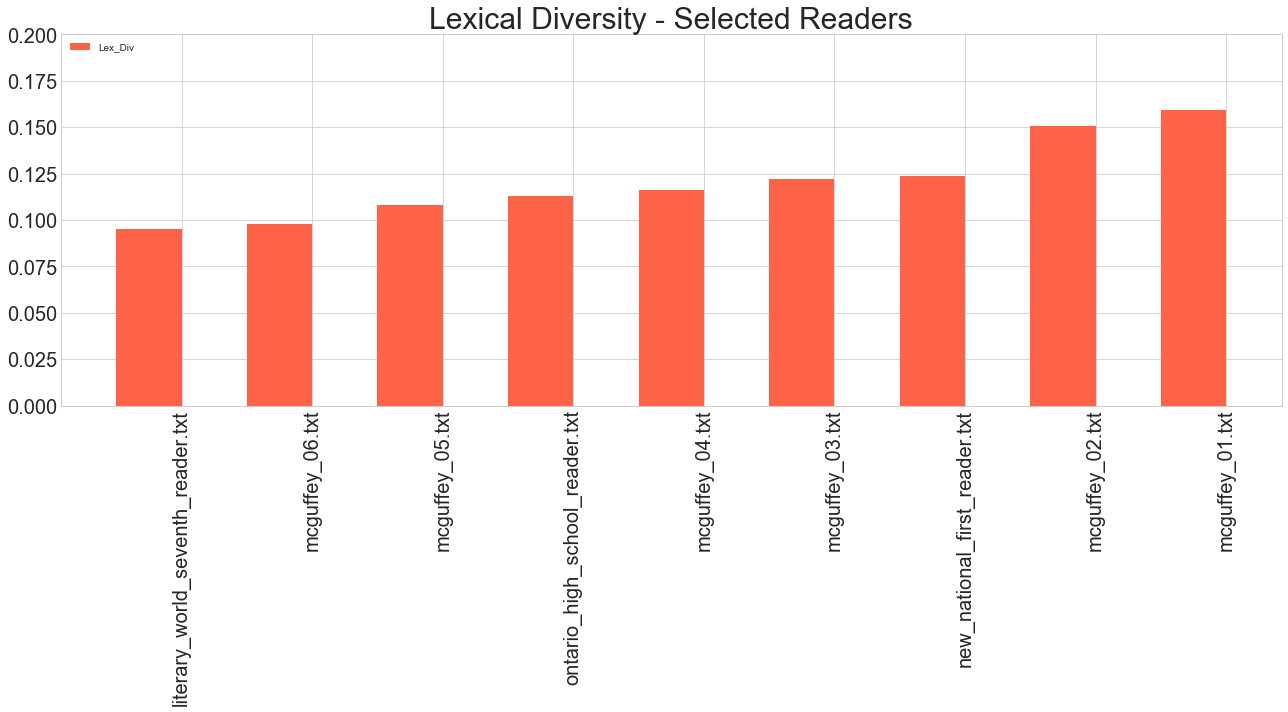

In [7]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... plot - lexical diversity scores - sorted in ascending TTR
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

N = 9
ind = np.arange(N) 
width = 0.5

_ = plt.figure(figsize = (18, 10))
offset = 0
plt.bar(ind + offset, results_tbl['lex_div'], width, label='Lex_Div', color = 'tomato')

plt.xticks(ind + width / 2, results_tbl['text_name'])
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.title('Lexical Diversity - Selected Readers', fontsize = '30')

axes = plt.gca()
axes.set_ylim([0, 0.2])

plt.savefig(plot_dir + 'nltk_readers_ttr.png')
plt.show()

<Container object of 9 artists>

<Container object of 9 artists>

([<matplotlib.axis.XTick at 0x7f643c6f8390>,
 <a list of 9 Text xticklabel objects>)

(array([ 0.2,  1.2,  2.2,  3.2,  4.2,  5.2,  6.2,  7.2,  8.2]),
 <a list of 9 Text xticklabel objects>)

/home/mcdevitt/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


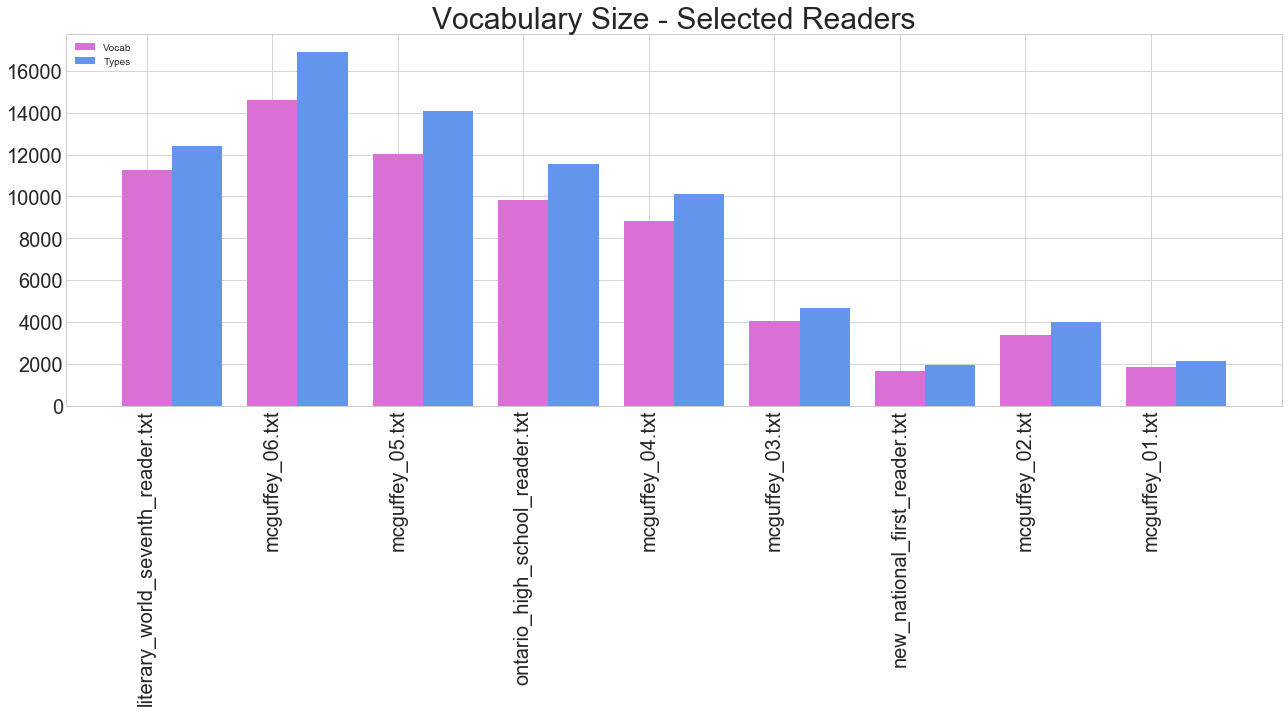

In [8]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... plot - vocabulary size - sorted in ascending TTR
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

N = 9
ind = np.arange(N) 
width = 0.4

_ = plt.figure(figsize = (18, 10))
offset = width / 2
plt.bar(ind + offset, results_tbl['num_vocab'], width, label='Vocab', color = 'orchid')
plt.bar(ind + offset + width, results_tbl['types'], width, label='Types', color = 'cornflowerblue')

plt.xticks(ind + width / 2, results_tbl['text_name'])
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.title('Vocabulary Size - Selected Readers', fontsize = '30')

axes = plt.gca()
#axes.set_ylim([0, 0.2])

plt.savefig(plot_dir + 'nltk_readers_vocab.png')
plt.show()

In [9]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... plot - vocabulary size - sorted in ascending TTR
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

N = 9
ind = np.arange(N) 
width = 0.4

_ = plt.figure(figsize = (18, 10))
offset = width / 2
plt.scatter(results_tbl['num_vocab'], np.log10(results_tbl['types']), color = 'orchid', s = 100)
plt.scatter(results_tbl['num_vocab'], np.log10(results_tbl['tokens']), color = 'slateblue', s = 100)
plt.scatter(results_tbl['num_vocab'], np.log10(results_tbl['num_sents']), color = 'cornflowerblue', s = 100)
plt.scatter(results_tbl['num_vocab'], np.log10(results_tbl['num_chars']), color = 'darkcyan', s = 100)

#plt.xticks(ind + width / 2, results_tbl['text_name'])
#plt.xticks(rotation=90)
plt.legend(loc='upper left', fontsize = '25')
plt.title('Vocabulary Size - Selected Readers', fontsize = '30')
plt.xlabel('Number of Vocabulary Words', fontsize = '25')
plt.ylabel('Corresponding Statistics (log10 scale)', fontsize = '25')

axes = plt.gca()
axes.set_ylim([1, 7])

plt.savefig(plot_dir + 'nltk_metrics_vs_vocab.png')
plt.show()

AttributeError: 'int' object has no attribute 'log10'

In [ ]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... plot comparison of all (normalized) metrics - sorted in descending TTR
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
results = results.sort_values(results_tbl.columns[7], ascending = False)
N = 9
ind = np.arange(N) 
width = 0.143

_ = plt.figure(figsize = (18, 8))
offset = width / 2
plt.bar(ind + offset, results['lex_div'], width, label='Lex_Div', color = 'tomato')
plt.bar(ind + offset + width, results['num_chars'], width, label='Chars', color = 'dodgerblue')
plt.bar(ind + offset + width*2, results['num_words'], width, label='Words', color = 'slateblue')
plt.bar(ind + offset + width*3, results['num_sents'], width, label='Sentences', color = 'cornflowerblue')
plt.bar(ind + offset + width*4, results['num_vocab'], width, label='Vocab', color = 'orchid')
plt.bar(ind + offset + width*5, results['vocab_ldiv'], width, label='Vocab_LDiv', color = 'darkcyan')

plt.xticks(ind + width / 2, results['text_name'])
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.title('Normalized Characteristics Comparison (Lex Div Sorted)', fontsize = '30')


axes = plt.gca()
axes.set_ylim([-0.1, 1.1])

plt.savefig(plot_dir + 'nltk_readers_ttr_normalized.png')
plt.show()

<Container object of 9 artists>

([<matplotlib.axis.XTick at 0x7f958eccccf8>,
 <a list of 9 Text xticklabel objects>)

(array([ 0.25,  1.25,  2.25,  3.25,  4.25,  5.25,  6.25,  7.25,  8.25]),
 <a list of 9 Text xticklabel objects>)

(0, 0.2)

/usr/lib/python3/dist-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


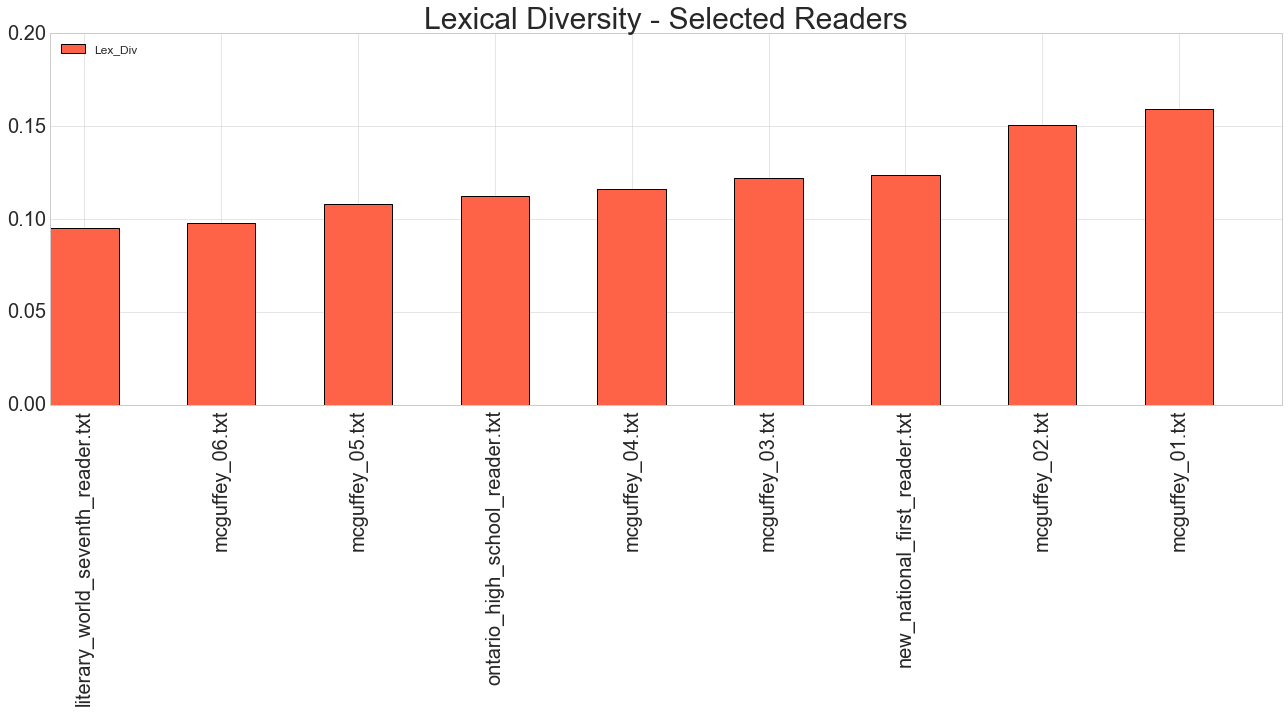

<Container object of 9 artists>

<Container object of 9 artists>

([<matplotlib.axis.XTick at 0x7f958eb801d0>,
 <a list of 9 Text xticklabel objects>)

(array([ 0.2,  1.2,  2.2,  3.2,  4.2,  5.2,  6.2,  7.2,  8.2]),
 <a list of 9 Text xticklabel objects>)

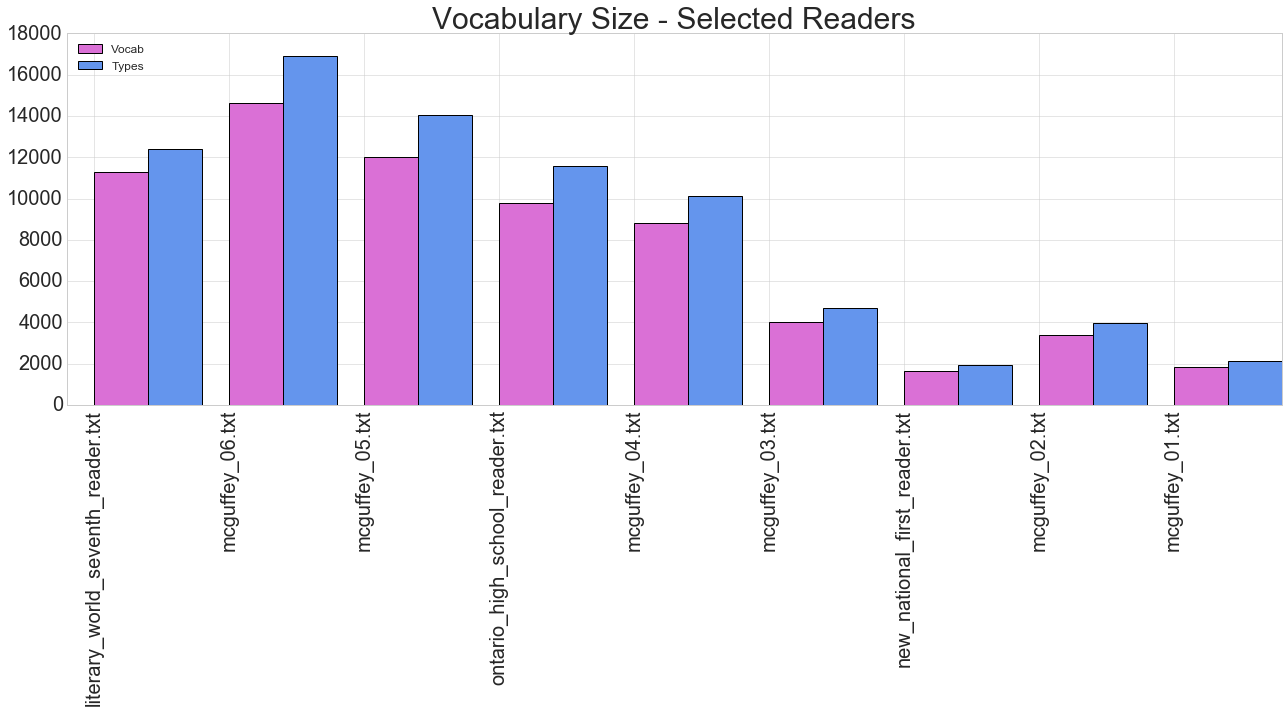

(1, 7)

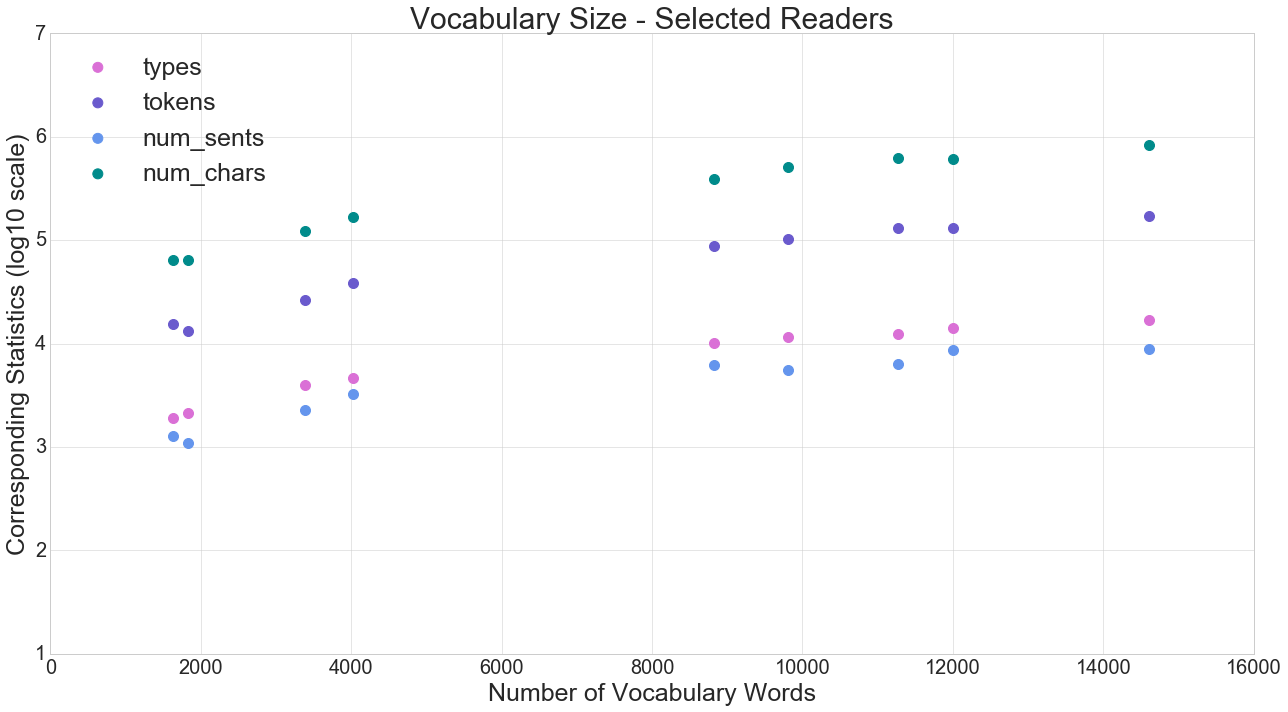

<Container object of 9 artists>

<Container object of 9 artists>

<Container object of 9 artists>

<Container object of 9 artists>

<Container object of 9 artists>

<Container object of 9 artists>

([<matplotlib.axis.XTick at 0x7f958ea89f60>,
 <a list of 9 Text xticklabel objects>)

(array([ 0.0715,  1.0715,  2.0715,  3.0715,  4.0715,  5.0715,  6.0715,
         7.0715,  8.0715]), <a list of 9 Text xticklabel objects>)

(-0.1, 1.1)

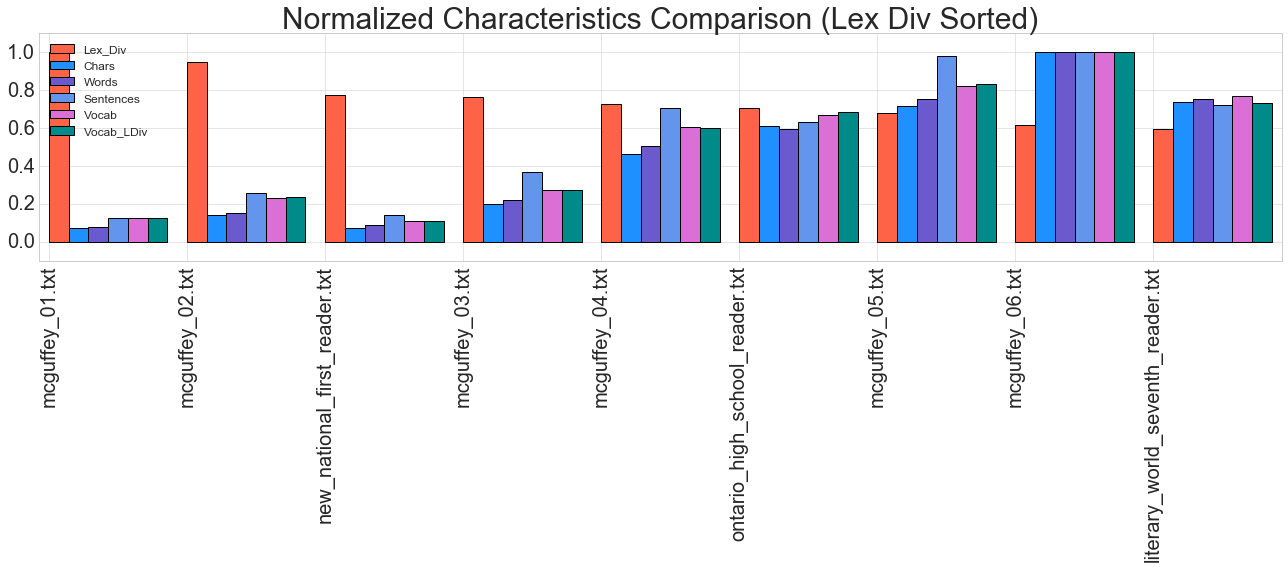

<Container object of 9 artists>

<Container object of 9 artists>

<Container object of 9 artists>

<Container object of 9 artists>

<Container object of 9 artists>

<Container object of 9 artists>

([<matplotlib.axis.XTick at 0x7f958eabf898>,
 <a list of 9 Text xticklabel objects>)

(array([ 0.0715,  1.0715,  2.0715,  3.0715,  4.0715,  5.0715,  6.0715,
         7.0715,  8.0715]), <a list of 9 Text xticklabel objects>)

(-0.1, 1.1)

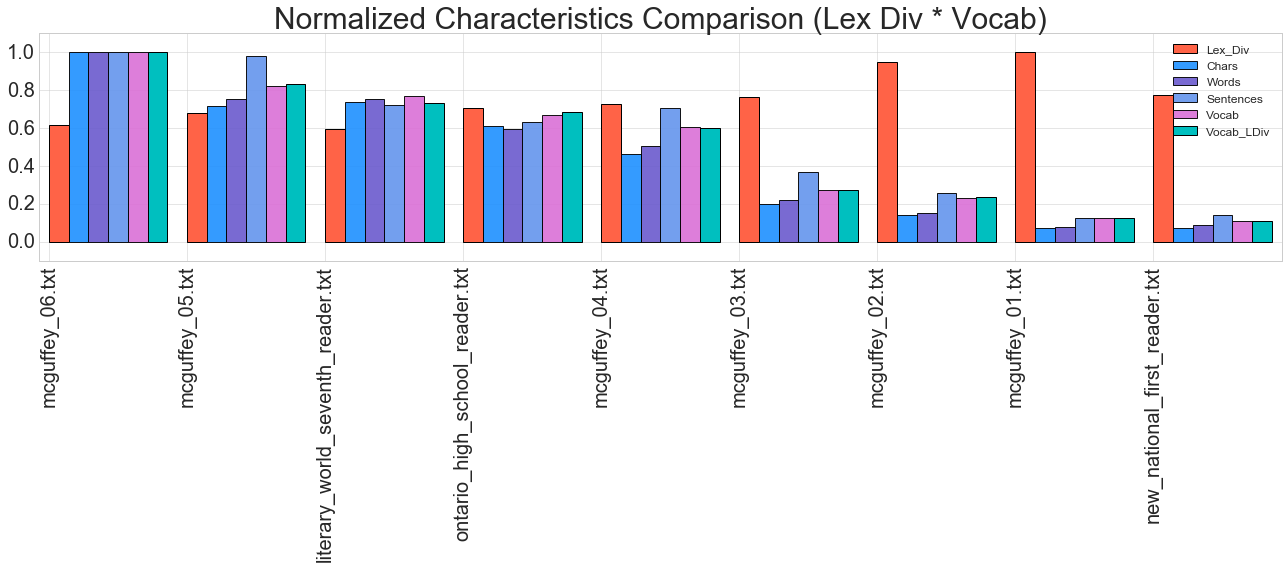

In [2]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... plot comparison of all (normalized) metrics - 
# ... sorted in descending TTR*num_tokens
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

results = results.sort_values(results_tbl.columns[8], ascending = False)
N = 9
ind = np.arange(N) 
width = 0.143

_ = plt.figure(figsize = (18, 8))

offset = width / 2
plt.bar(ind + offset, results['lex_div'], width, label='Lex_Div', color = 'tomato')
plt.bar(ind + offset + width, results['num_chars'], width, label='Chars', color = 'dodgerblue', alpha = 0.9)
plt.bar(ind + offset + width*2, results['num_words'], width, label='Words', color = 'slateblue', alpha = 0.9)
plt.bar(ind + offset + width*3, results['num_sents'], width, label='Sentences', color = 'cornflowerblue', alpha = 0.9)
plt.bar(ind + offset + width*4, results['num_vocab'], width, label='Vocab', color = 'orchid', alpha = 0.9)
plt.bar(ind + offset + width*5, results['vocab_ldiv'], width, label='Vocab_LDiv', color = 'c')

plt.xticks(ind + width / 2, results['text_name'])
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.title('Normalized Characteristics Comparison (Lex Div * Vocab)', fontsize = '30')

axes = plt.gca()
axes.set_ylim([-0.1, 1.1])

plt.savefig(plot_dir + 'nltk_readers_ttrxtokens_normalized.png')
plt.show()

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... end_of_file
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-